<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/Python_ile_Makine_%C3%96%C4%9Fremesi_Basit_Do%C4%9Frusal_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basit doğrusal Regresyon Modeli Eğitimi**

Verinin içe aktarımı

Verinin görselleştirmesi

Basit doğrusal regresyon modelimizin eğitiminin gerçekleştirilmesi, test edilmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
path= "/content/drive/MyDrive/BTK/DATASET/dogrusal_regresyon_veriseti_20220209.csv"
df = pd.read_csv(path, sep = ";") #cvs=coma seperated value
#bu veri ";" ile ayrıldı, Pandas özellikle seperator belirtilmediğinde seperator olaran "," olduğunu varsayıyor ama burada ";" ile ayrıldığı için ayrıca belirtildi
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


Keşifsel Veri Görselleştirme
Bu adımda verinin lineer regresyon'a uygunluğu kontrol edilecek

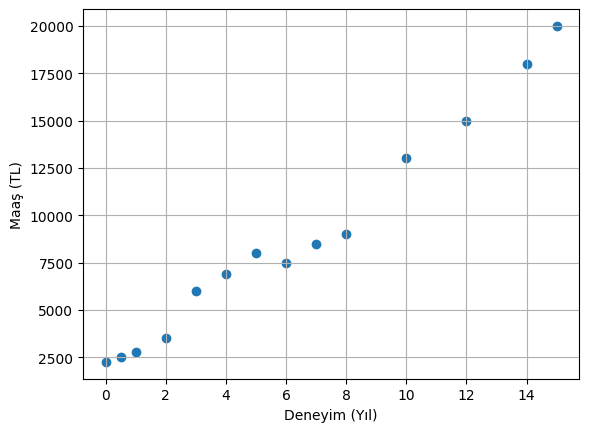

In [3]:
#veriyi görselleştir
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.grid(True)
plt.show()

Oluşan grafiğe bakılarak doğrusal regresyon kullanabileceğimize emin oldum.

In [4]:
#Doğrusal Regresyon Modeli Eğitimi
#doğrusal regresyon modeli
linear_reg= LinearRegression()
#data içerisinde bulunan maas ve deneyim sütunlarını numpy array'e çevir
x= df.deneyim.values.reshape(-1,1) #scikit learn için bu format çok önemli
y= df.maas.values.reshape(-1,1)

#doğrusal regresyon eğitimi
linear_reg.fit(x,y)

LinearRegression()

In [5]:
# y eksenini kestiği nokta intercept bulunması
y_ekseni_kesisim= np.array([0]).reshape(1,-1)
b0 = linear_reg.predict(y_ekseni_kesisim)
print("b0:", b0)

#y eksenini kestigi nokta (intercept)
b0_ = linear_reg.intercept_ #0 yıl deneyime sahip birinin aldığı maaş
print("b0_:", b0_)

#egim(slope) bulunmasu
b1 = linear_reg.coef_ #deneyim kazanılan her yılın maaşa etkisi
print("b1:", b1)

b0: [[1663.89519747]]
b0_: [1663.89519747]
b1: [[1138.34819698]]


In [6]:
#maas = 1663 + 1138*deneyim
#y eksenini kestiği nokta ve eğime göre doğrusal model olusturulur

deneyim = 11 #11 yıllık deneyim

#11 yıllık deneyime sahip birirnin maaşı tahmin edilir
maas_yeni = 1663 + 1138*deneyim
print(maas_yeni)

#11 yılllık deneyime sahip birinin maaşı predict metodu ile tahmin edilir
sonuc= linear_reg.predict(np.array([deneyim]).reshape(1,-1)) #deneyim degiskeni formata uygun olmalı
print("11 yıllık deneyime sahip birinin maaşı: {} TL".format(sonuc[0]))


14181
11 yıllık deneyime sahip birinin maaşı: [14185.72536421] TL


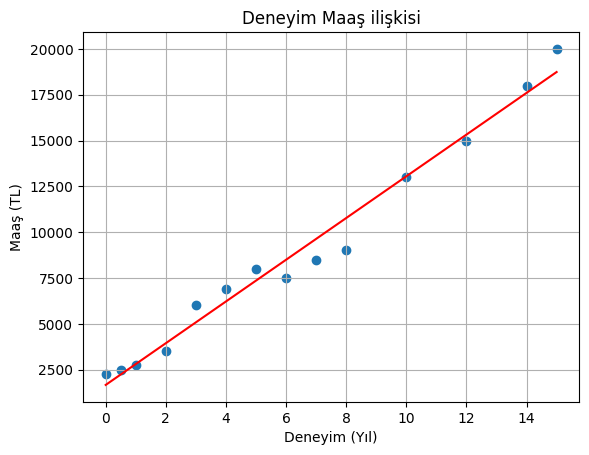

In [7]:
#Dogrusal Regresyon Modeli ile Test/Tahmin/Görselleştirme
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1) #deneyim formata uygun olmalı
plt.figure()
plt.scatter(x,y)

# 0-15 yılları arasında deneyime sahip insanların maaşı tahmin edilir
y_head = linear_reg.predict(array)
plt.plot(array, y_head, color = "red") # (deneyim,maaş)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş ilişkisi")
plt.grid(True)
plt.show()

Örneğin yeni işe alımlarda maaş teklifi bu analize göre yapılabilir.